In [52]:
import os
from base_fns import get_local_folder

os.chdir(os.path.dirname(get_local_folder()))
import pandas as pd
import tabulate as tb
from hydra import compose, initialize
from omegaconf import OmegaConf
import random
from munch import Munch
import numpy as np
from pandarallel import pandarallel
from pathlib import Path
from transformers import BertTokenizerFast as BertTokenizer, BertModel
import seaborn as sns
import matplotlib.pyplot as plt

with initialize(
    version_base=None,
    config_path="../cfg",
):
    cfg = compose(config_name="main")

random.seed(cfg.random.seed)
np.random.seed(cfg.random.seed)

In [53]:
df = Munch()
for k, v in cfg.data.processed.text.items():
    df[k] = pd.read_json(v, lines=True)

## Tokens

In [54]:
BERT_MODEL_NAME = "bert-base-cased"
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)

/home/paul/CellTriage/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paul/CellTriage/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 512.0)

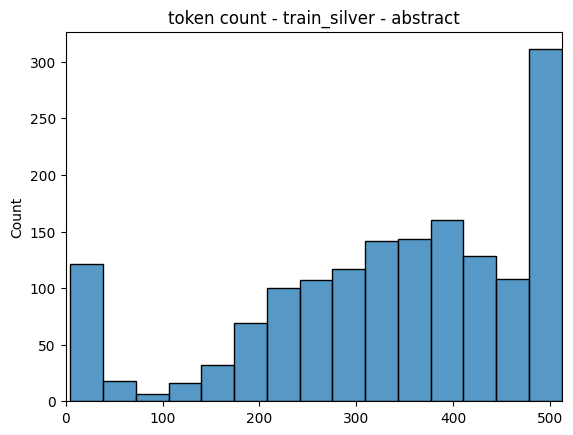

In [62]:
token_counts = []

for _, row in df.train_silver.iterrows():
    token_count = len(
        tokenizer.encode(row["ABSTRACT"], max_length=512, truncation=True)
    )
    token_counts.append(token_count)

sns.histplot(token_counts)
plt.title(f"token count - train_silver - abstract")
plt.xlim([0, 512])

/home/paul/CellTriage/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/paul/CellTriage/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 512.0)

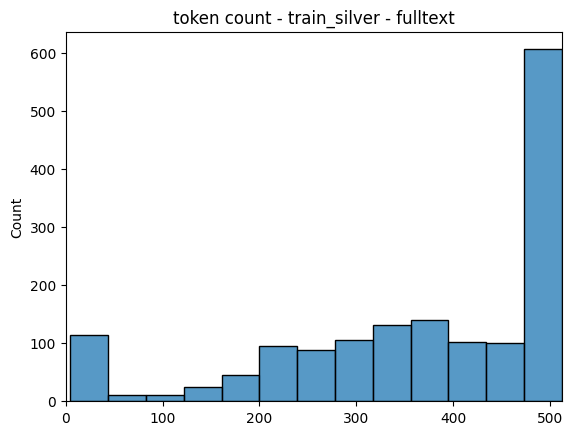

: 

In [65]:
token_counts = []

for _, row in df.train_silver.iterrows():
    token_count = len(
        tokenizer.encode(row["FULLTEXT"], max_length=512, truncation=True)
    )
    token_counts.append(token_count)

sns.histplot(token_counts)
plt.title(f"token count - train_silver - fulltext")
plt.xlim([0, 512])

The majority of the texts, both for abstracts and fulltexts, are at least 512 tokens long. 